In [ ]:
import keras

from keras import   Sequential

from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

from keras.datasets import mnist

import tensorflow as tf

from keras import backend as k

import matplotlib.pyplot as plt

import numpy as np



In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

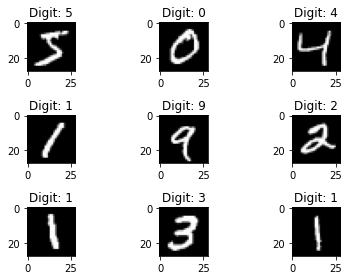

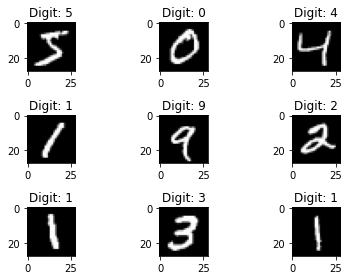

In [ ]:
fig = plt.figure()

for i in range(9):
  plt.subplot(3,3,i+1)

  plt.tight_layout()

  plt.imshow(x_train[i], cmap='gray')

  plt.title("Digit: {}".format(y_train[i]))

fig  

In [ ]:
y_train[0]

5

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
k.image_data_format()

'channels_last'

In [ ]:
#RGB channel_last

#(dim1,dim2,dim3)

#RGB channel_last  (width,height,depth)

#RGM channel_first  (depth,width,height)



In [ ]:
img_rows= 28
img_cols = 28

In [ ]:
x_train.shape 

(60000, 28, 28)

In [ ]:
#reshaping

if k.image_data_format()== "channels_first":
   x_train=x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
   x_test=x_test.reshape(x_test.shape[0],1,img_rows,img_cols)

else:

   x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
   x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

In [ ]:
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
#DATA transformation:Normalization

x_train  = x_train.astype('float64')

x_test  = x_test.astype('float64')

x_train /=255

x_test /=255



In [ ]:
num_categoy=10

In [ ]:
y_train[0]

5

Transformation : class(y)

In [ ]:
#one hot encoder

y_train = tf.keras.utils.to_categorical(y_train,num_categoy)

y_test = tf.keras.utils.to_categorical(y_test,num_categoy)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
input_shape = (28,28,1)

CNN: image classfication

In [ ]:
model = Sequential()


#1-convulution layer

model.add(Conv2D(32 , kernel_size=(3,3) , activation='relu' ,input_shape=input_shape))

#2-convulution layer
model.add(Conv2D(64 , kernel_size=(3,3) , activation='relu' ))


model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

#fully connected
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

#output_layer
model.add(Dense(num_categoy, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam',
              metrics=['accuracy'])

## Define your callbacks
Modle_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'mnist_save_best_so_far.h5',
    monitor='val_loss',
    save_best_only='True',
    verbose=1
)

Early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights='True',
    min_delta=0.1
)



batch_size=50

num_epoch = 20

model.fit(x_train,y_train,batch_size=batch_size,epochs=num_epoch,
          callbacks=[Early_Stopping, Modle_Checkpoint,  ],
          validation_data=(x_test,y_test))


Epoch 1/20
1200/1200 [==============================] - ETA: 0s - loss: 0.2116 - accuracy: 0.9366
Epoch 1: val_loss improved from inf to 0.05316, saving model to mnist_save_best_so_far.h5
1200/1200 [==============================] - 190s 158ms/step - loss: 0.2116 - accuracy: 0.9366 - val_loss: 0.0532 - val_accuracy: 0.9830
Epoch 2/20
1200/1200 [==============================] - ETA: 0s - loss: 0.0861 - accuracy: 0.9749
Epoch 2: val_loss improved from 0.05316 to 0.03793, saving model to mnist_save_best_so_far.h5
1200/1200 [==============================] - 188s 156ms/step - loss: 0.0861 - accuracy: 0.9749 - val_loss: 0.0379 - val_accuracy: 0.9869
Epoch 3/20
1200/1200 [==============================] - ETA: 0s - loss: 0.0666 - accuracy: 0.9804
Epoch 3: val_loss improved from 0.03793 to 0.03258, saving model to mnist_save_best_so_far.h5
1200/1200 [==============================] - 186s 155ms/step - loss: 0.0666 - accuracy: 0.9804 - val_loss: 0.0326 - val_accuracy: 0.9885
Epoch 4/20
1200/1

In [ ]:
from keras.models import load_model

model_best = load_model('/content/mnist_save_best_so_far.h5')

model_best.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

accuracy on test set

In [ ]:
acc=model.evaluate(x_test,y_test)

print(acc)

313/313 [==============================] - 10s 33ms/step - loss: 0.0302 - accuracy: 0.9930
[0.03015325404703617, 0.9929999709129333]


In [ ]:

#without callbacks

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

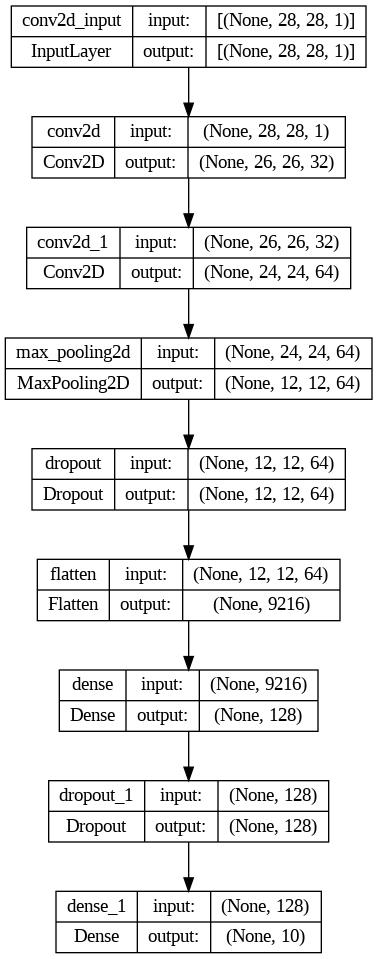

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

Some advantages of using these CallBacks:
These callbacks can help you fight overfitting,
Help you save frustration by saving your best models seen so far before collab or Kaggle gives up on training (trust me I have been there!!)
Takes away the need to explicitly define the number of epochs for your training